<a href="https://colab.research.google.com/github/joy98/hello-world/blob/master/Basic_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
  

TensorFlow 2.x selected.


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0-rc2


In [0]:
data=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=data.load_data()


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

               

Looking at one of the images

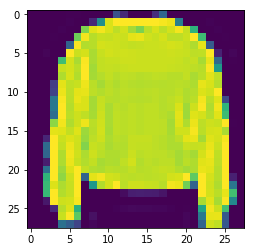

In [7]:
plt.imshow(train_images[7])
plt.show()

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

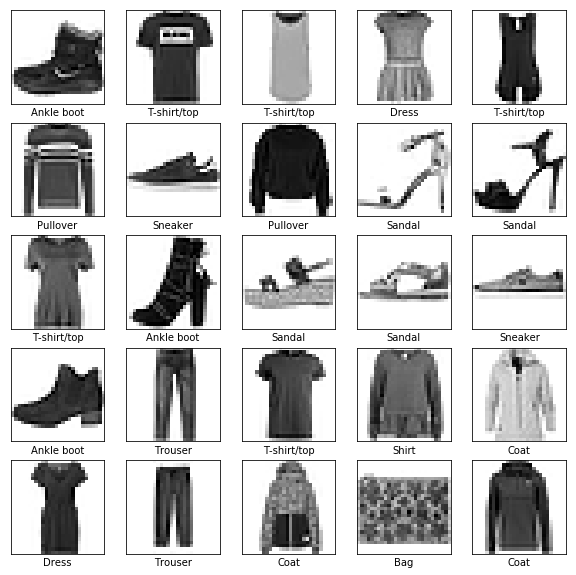

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4220 - accuracy: 0.8508
Epoch 2/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4153 - accuracy: 0.8544
Epoch 3/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4100 - accuracy: 0.8561
Epoch 4/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4047 - accuracy: 0.8568
Epoch 5/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3997 - accuracy: 0.8589
Epoch 6/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3952 - accuracy: 0.8603
Epoch 7/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3909 - accuracy: 0.8616
Epoch 8/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3869 - accuracy: 0.8634
Epoch 9/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3828 - accuracy: 0.8645
Epoch 10/20
60

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.3230 - accuracy: 0.8566

Test accuracy: 0.8566


In [20]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])


9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

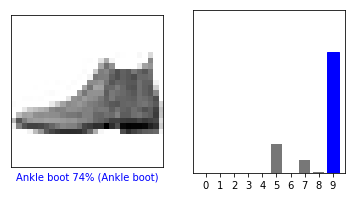

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

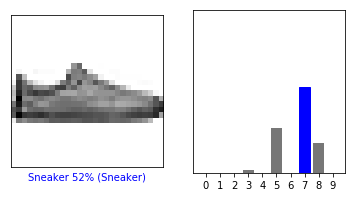

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

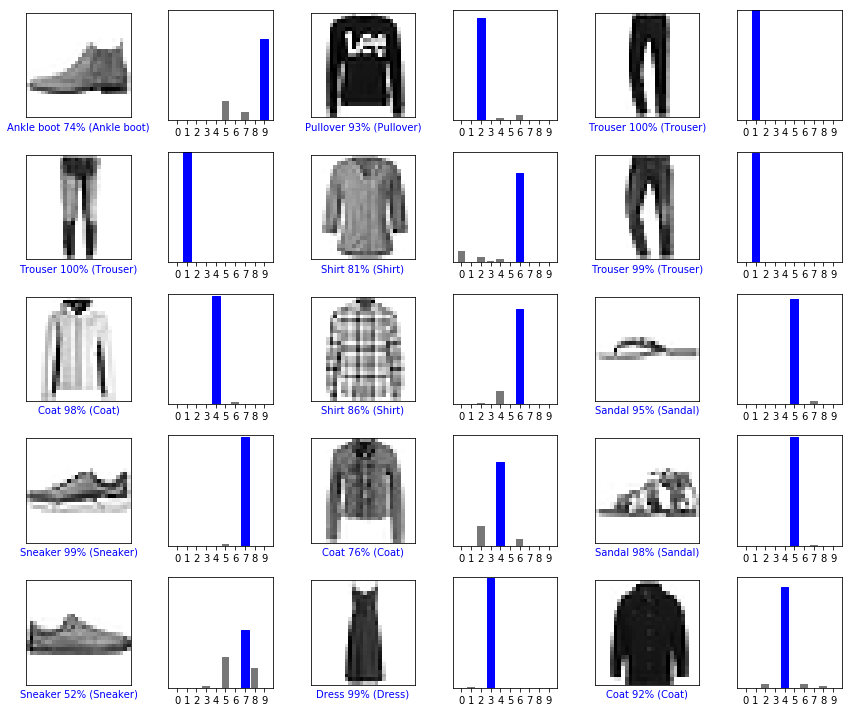

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
img = test_images[1]
print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


[[2.6335445e-04 3.9668176e-08 9.2809892e-01 1.7503949e-06 2.1784471e-02
  1.0066501e-12 4.9833596e-02 4.9219436e-21 1.7965989e-05 2.5336239e-17]]


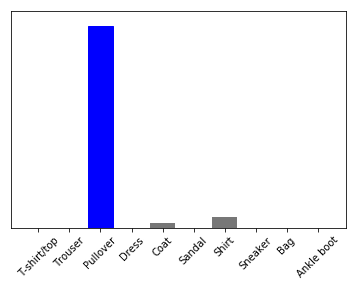

In [31]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [32]:
np.argmax(predictions_single[0])

2